## Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import re
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from scipy.stats import skew
from scipy.stats import chi2_contingency
from statsmodels.stats.weightstats import ztest
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu 
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, confusion_matrix

import warnings
warnings.filterwarnings(action='ignore')

print("All Modules Imported Successfully")

All Modules Imported Successfully


## Read Dataset

In [2]:
data = pd.read_csv("../data/adult_income.csv")
adultIncome_df = pd.DataFrame(data)

In [3]:
adultIncome_df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


## Problem Statement:

In this dataset, we have demographic and employment data of individuals, including details such as age, education, occupation, and marital status, among other features. The income level of these individuals is influenced by various personal and work-related factors. Understanding these factors is crucial for better decision-making, particularly for policy-making, financial services, and targeted interventions aimed at improving financial wellbeing.

---

## The business problem we should solve here is:
Determine which factors most strongly influence an individual’s income level, particularly in identifying those likely to earn above or below $50,000 per year. The dataset allows for a comprehensive analysis of socio-economic patterns and provides a platform to build models that can predict income level based on a variety of demographic and employment-related characteristics.

---

## Objective:
Perform exploratory data analysis (EDA) and develop models to identify the most significant factors affecting income, assess various feasible models, and determine the most appropriate model for predicting income levels.

## Variable Description

1. age: The age of the individual.
2. workclass: Type of employment (e.g., Private, Government, Self-Employed).
3. fnlwgt: Final sample weight, representing how many people the individual represents.
4. education: The highest level of education attained (e.g., Bachelors, HS-grad).
5. education-num: Numerical representation of education level.
6. marital-status: The marital status of the individual (e.g., Married, Never-married).
7. occupation: The individual’s occupation category (e.g., Exec-managerial, Craft-repair).
8. relationship: The relationship status within a family (e.g., Husband, Wife, Not-in-family).
9. race: The race of the individual (e.g., White, Black, Asian).
10. sex: Gender of the individual (Male, Female).
11. capital-gain: Capital gains from investments.
12. capital-loss: Losses from investments.
13. hours-per-week: The number of hours worked per week.
14. native-country: The country of origin for the individual.
15. income: Binary target variable representing whether the individual's income is greater than or less than $50,000 per year.


## Overview of the Dataset

In [4]:
adultIncome_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


## Checking Missing Values

In [5]:
adultIncome_df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

## Fill Missing Values with Mean and Mode

## Univariate Analysis

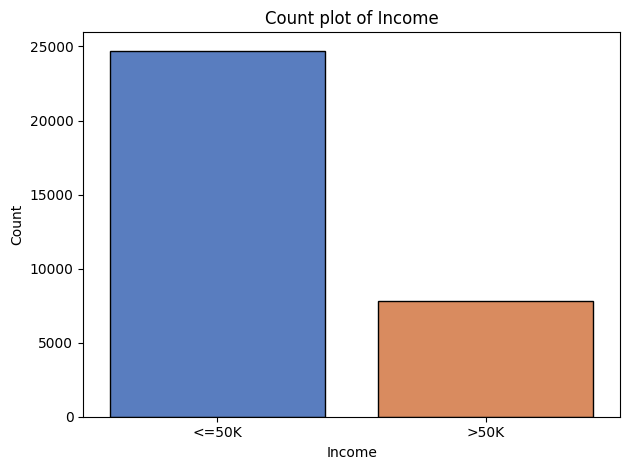

In [9]:
sns.countplot(x = adultIncome_df['income'], palette = "muted", edgecolor='black')
plt.title('Count plot of Income')
plt.xlabel('Income')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

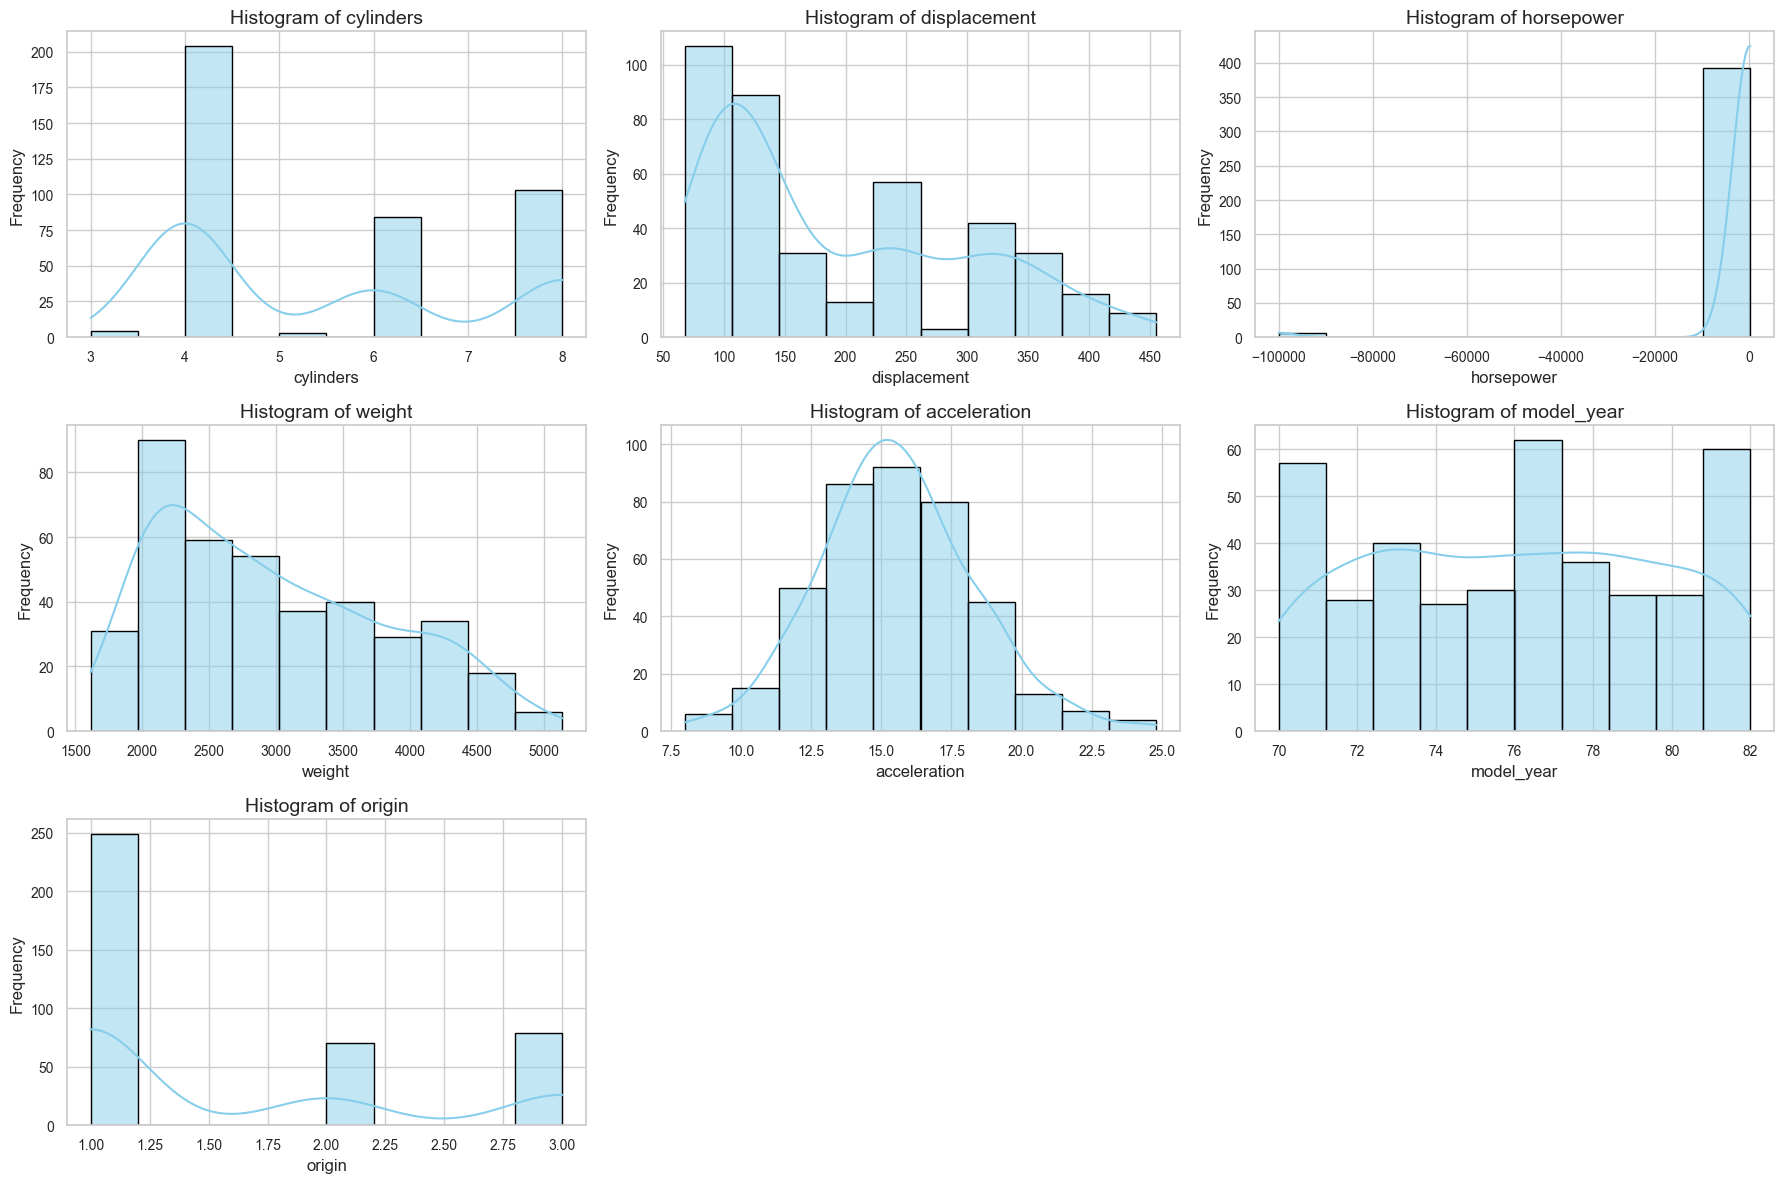

In [9]:
all_cols = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin']

sns.set(style="whitegrid")
plt.rcParams.update({'axes.titlesize': 14, 'axes.labelsize': 12, 'xtick.labelsize': 10, 'ytick.labelsize': 10})

plt.figure(figsize=(18, 12))
for i, col in enumerate(all_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(autoMPG_df[col], kde = True, color='skyblue', edgecolor='black', bins=10)
    plt.title(f'Histogram of {col}')
    plt.xlabel(f'{col}')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

***Insights***

1. **Cylinders**: 
   - The distribution is skewed towards 4-cylinder engines, which dominate the data.
   - 6-cylinder engines are the second most common, followed by 8-cylinder ones.
   - 5 and 7-cylinder configurations are very rare, suggesting most cars have 4, 6, or 8 cylinders.

2. **Displacement**: 
   - The distribution is right-skewed, with the majority of vehicles having a displacement between 100 and 200 cubic inches.
   - A few vehicles have very large displacement values, above 300, which could represent higher-performance or larger vehicles.

3. **Horsepower**: 
   - The data shows an unusual distribution, indicating possible issues such as negative or outlier values, which need investigation.
   - Apart from the outliers, most vehicles have horsepower between 75 and 150, with a peak around 100 horsepower.

4. **Weight**: 
   - The weight distribution is right-skewed, with most cars weighing between 2000 and 3000 pounds.
   - Heavier cars, above 3500 pounds, are less common, which might represent older or larger cars, like SUVs or trucks.

5. **Acceleration**: 
   - The distribution is fairly normal, centered around 15 seconds for 0-60 mph acceleration.
   - Most cars have acceleration times between 10 and 20 seconds, indicating typical performance vehicles.

6. **Model Year**: 
   - The distribution is relatively uniform, with a slight peak around the late 70s to early 80s.
   - This indicates that cars from multiple years are well-represented, but the late 70s models are slightly more common.

7. **Origin**: 
   - Most cars originate from region 1, likely representing American-made cars.
   - Region 2 and 3 have fewer cars in comparison, suggesting that American cars dominate the dataset

## Summary Statistics

In [9]:
autoMPG_df.describe()

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,mpg
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,5.454774,193.425879,-1404.643216,2970.424623,15.568090,76.010050,1.572864,23.514573
std,1.701004,104.269838,12213.424763,846.841774,2.757689,3.697627,0.802055,7.815984
min,3.000000,68.000000,-100000.000000,1613.000000,8.000000,70.000000,1.000000,9.000000
25%,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000,17.500000
50%,4.000000,148.500000,92.000000,2803.500000,15.500000,76.000000,1.000000,23.000000
75%,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,2.000000,29.000000
max,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000,46.600000


## Skewness and Kurtosis

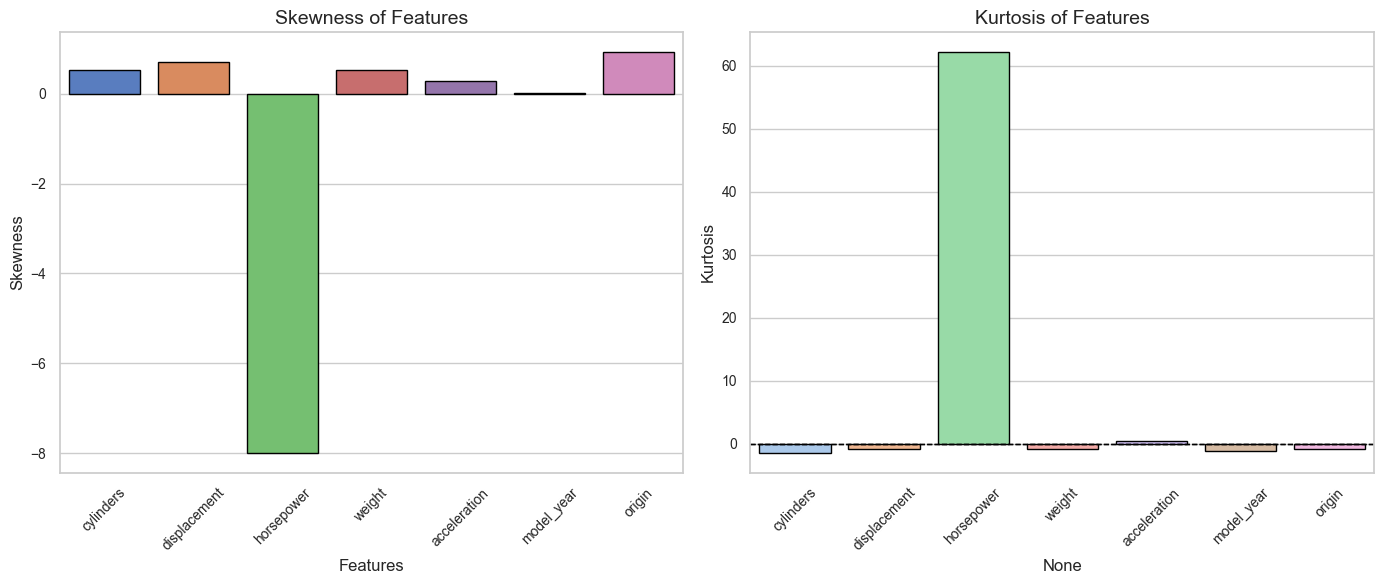

In [18]:
skewness_values_filtered = autoMPG_df.drop(columns=['car_name', 'mpg']).skew()
kurtosis_values_filtered = autoMPG_df.drop(columns=['car_name', 'mpg']).kurtosis()

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

sns.barplot(x=skewness_values_filtered.index, y=skewness_values_filtered.values, palette='muted', ax=ax[0], edgecolor='black')
ax[0].set_title('Skewness of Features')
ax[0].set_xlabel('Features')
ax[0].set_ylabel('Skewness')
plt.axhline(0, color='black', linewidth=1, linestyle='--')
ax[0].set_xticklabels(skewness_values_filtered.index, rotation=45)

sns.barplot(x=kurtosis_values_filtered.index, y=kurtosis_values_filtered.values, palette='pastel', ax=ax[1], edgecolor='black')
ax[1].set_title('Kurtosis of Features')
ax[0].set_xlabel('Features')
ax[1].set_ylabel('Kurtosis')
plt.axhline(0, color='black', linewidth=1, linestyle='--')
ax[1].set_xticklabels(kurtosis_values_filtered.index, rotation=45)

plt.tight_layout()
plt.show()


***Insights***

### Skewness Insights:
- **Horsepower**: Has a significant negative skew (-8), indicating the data is highly left-skewed, with a long tail on the left side. This suggests that most cars in the dataset have higher horsepower, but there are a few cars with very low horsepower values.
- **Displacement, Weight, and Cylinders**: These features have slight positive skewness, meaning they are right-skewed with long tails on the right. This indicates that there are a few cars with very high values for displacement, weight, and cylinders compared to the rest of the dataset.
- **Acceleration**: Slight positive skew, meaning there are more cars with lower acceleration, but a few with higher than average acceleration.
- **Model Year and Origin**: Both of these features show a very slight skew close to zero, indicating a nearly symmetric distribution. This suggests that these features are well-balanced in the dataset.

### Kurtosis Insights:
- **Horsepower**: Displays extremely high kurtosis (over 60), indicating that the data has heavy tails or outliers. It has many extreme values or outliers.
- **Other Features** (Cylinders, Displacement, Weight, Acceleration, Model Year, Origin): The kurtosis values for these features are close to 0 or slightly negative, indicating a platykurtic distribution (flatter than a normal distribution). This suggests that there are fewer outliers or extreme values in these features compared to horsepower.

## Variable Binning or Bucketing

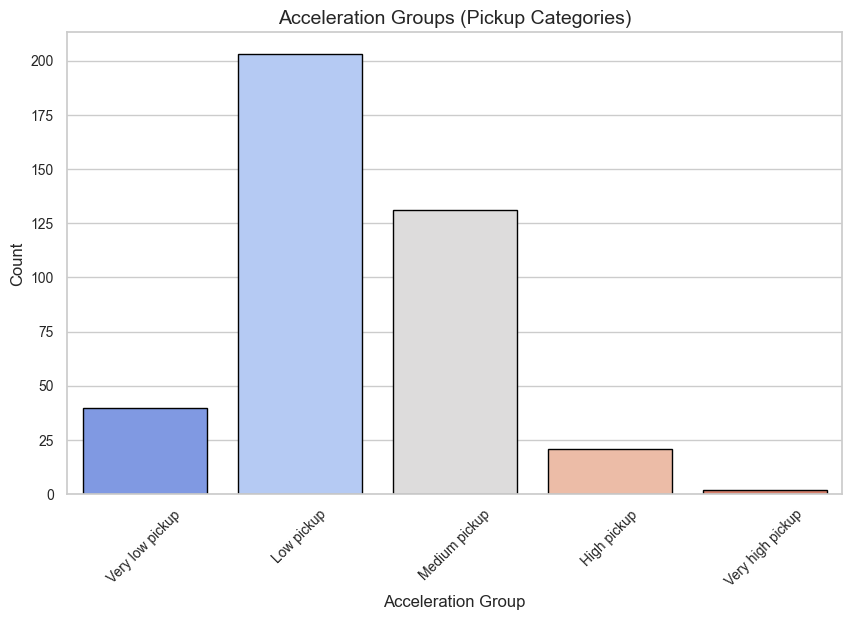

In [13]:
acceleration_bins = [8, 12, 16, 20, 24, float('inf')]
acceleration_labels = ['Very low pickup', 'Low pickup', 'Medium pickup', 'High pickup', 'Very high pickup']

autoMPG_df['acceleration_group'] = pd.cut(autoMPG_df['acceleration'], bins=acceleration_bins, labels=acceleration_labels)

plt.figure(figsize=(10, 6))
sns.countplot(data=autoMPG_df, x='acceleration_group', palette='coolwarm',  edgecolor='black')
plt.title('Acceleration Groups (Pickup Categories)')
plt.xlabel('Acceleration Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

***Insights***
The bar chart represents the distribution of vehicles across different **acceleration categories**, which are grouped based on their pickup characteristics:

1. **Low Pickup (12-16 acceleration):**
   - The majority of vehicles fall into this category, with over 200 vehicles having low pickup.
   - This suggests that most cars in the dataset have moderate acceleration capabilities.

2. **Medium Pickup (16-20 acceleration):**
   - The second-largest group, containing over 125 vehicles, represents vehicles with medium pickup.
   - This indicates that a significant number of vehicles have moderate acceleration rates.

3. **Very Low Pickup (8-12 acceleration):**
   - A smaller group, with around 25 vehicles, has very low pickup, indicating slower acceleration.

4. **High Pickup (20-24 acceleration):**
   - A relatively small number of vehicles, approximately 30, fall into this high pickup group, reflecting cars with better acceleration performance.

5. **Very High Pickup (24+ acceleration):**
   - This is the smallest group, with very few vehicles (less than 10) classified as having very high pickup.
   - It shows that very few vehicles in the dataset are high-performance in terms of acceleration.

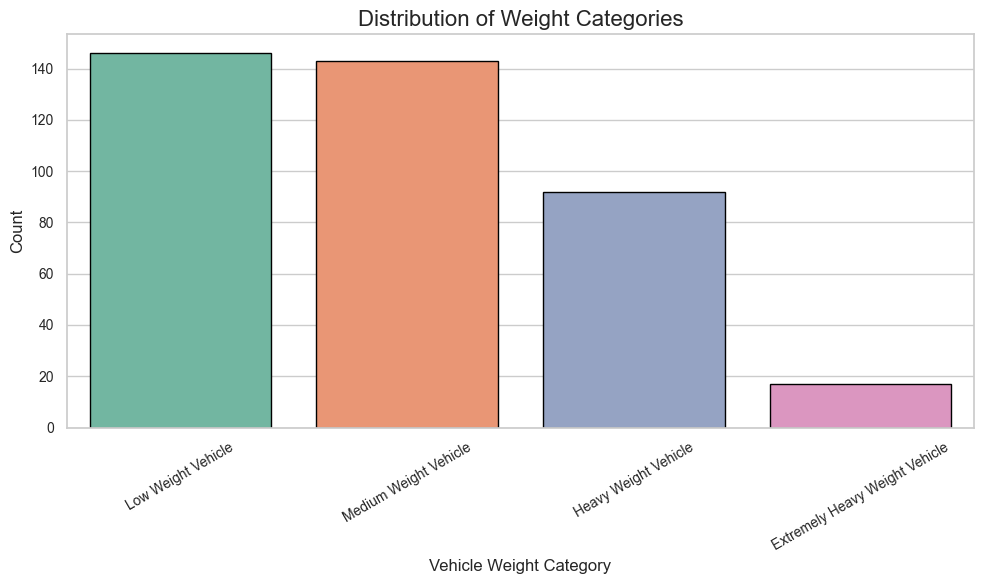

In [18]:
weight_bins = [0, 2500, 3500, 4500, float('inf')]
weight_labels = ['Low Weight Vehicle', 'Medium Weight Vehicle', 'Heavy Weight Vehicle', 'Extremely Heavy Weight Vehicle']

autoMPG_df['weight_category'] = pd.cut(autoMPG_df['weight'], bins=weight_bins, labels=weight_labels, right=False)

plt.figure(figsize=(10, 6))
sns.countplot(x='weight_category', data=autoMPG_df, palette='Set2',  edgecolor='black')

plt.title('Distribution of Weight Categories', fontsize=16)
plt.xlabel('Vehicle Weight Category', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


***Insights***

The bar chart displays the distribution of vehicles across **four weight categories**:

1. **Low Weight Vehicle (1500 to 2500 lbs):**
   - This is the largest category, with over 140 vehicles classified as low weight.
   - A significant proportion of vehicles in the dataset are lightweight, suggesting that many vehicles are relatively small and likely fuel-efficient.

2. **Medium Weight Vehicle (2500 to 3500 lbs):**
   - The second-largest category, nearly matching the low-weight category, also has over 140 vehicles.
   - This shows that medium-weight vehicles are almost as prevalent as low-weight ones, which likely includes mid-sized cars.

3. **Heavy Weight Vehicle (3500 to 4500 lbs):**
   - This group contains fewer vehicles compared to the first two, with about 90 vehicles categorized as heavy weight.
   - While still common, heavy-weight vehicles are less prevalent than lower-weight vehicles.

4. **Extremely Heavy Weight Vehicle (4500+ lbs):**
   - This is the smallest group, with very few vehicles falling into this category, likely less than 20.
   - Extremely heavy vehicles are rare in this dataset, likely representing large trucks or SUVs.


## Bivariate Analysis

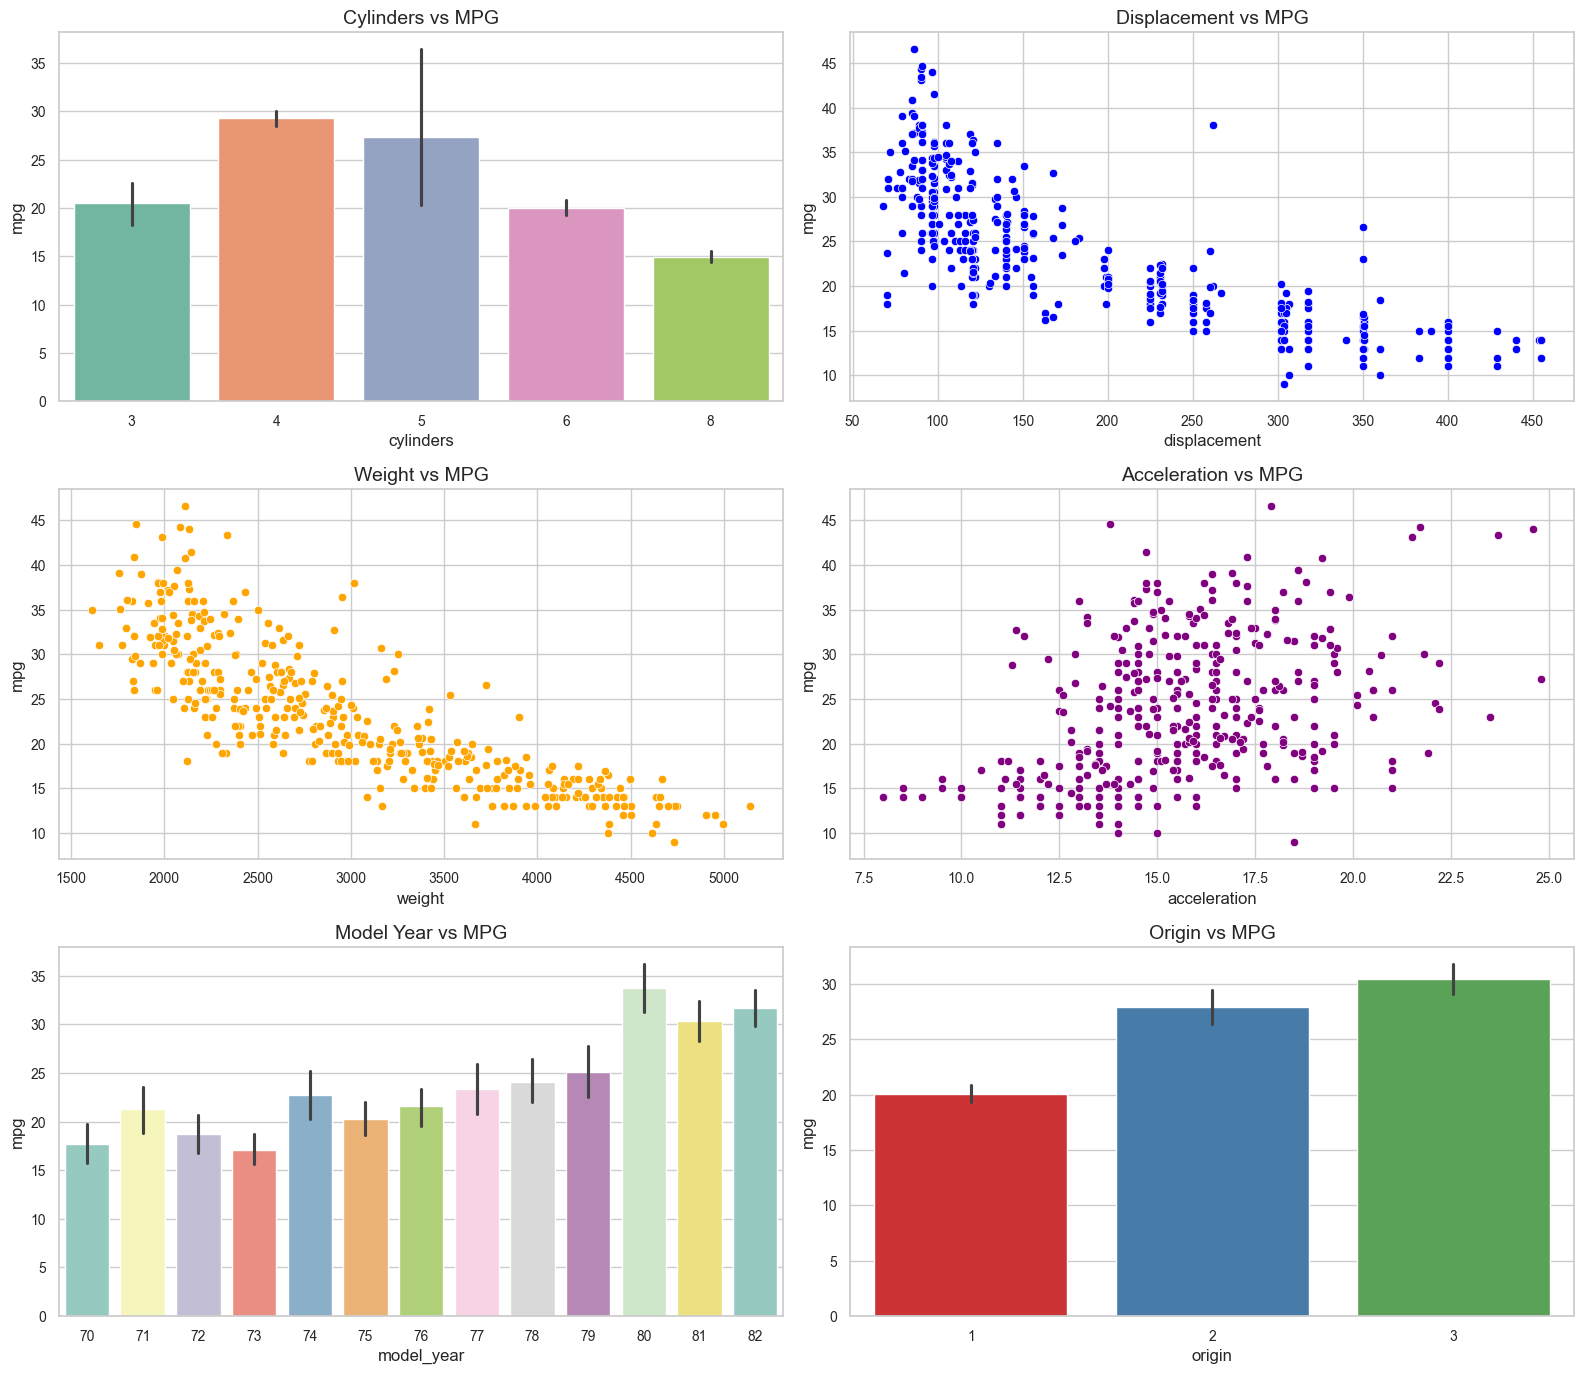

In [17]:
plt.figure(figsize=(16, 18))

# Plot 1: Cylinders vs MPG (Categorical variable, use bar plot for average mpg per cylinder)
plt.subplot(4, 2, 1)
sns.barplot(x='cylinders', y='mpg', data=autoMPG_df, palette='Set2', estimator='mean')
plt.title('Cylinders vs MPG')

# Plot 2: Displacement vs MPG (Continuous variable, use scatter plot)
plt.subplot(4, 2, 2)
sns.scatterplot(x='displacement', y='mpg', data=autoMPG_df, color='blue')
plt.title('Displacement vs MPG')

# Plot 3: Weight vs MPG (Continuous variable, use scatter plot)
plt.subplot(4, 2, 3)
sns.scatterplot(x='weight', y='mpg', data=autoMPG_df, color='orange')
plt.title('Weight vs MPG')

# Plot 4: Acceleration vs MPG (Continuous variable, use scatter plot)
plt.subplot(4, 2, 4)
sns.scatterplot(x='acceleration', y='mpg', data=autoMPG_df, color='purple')
plt.title('Acceleration vs MPG')

# Plot 5: Model Year vs MPG (Categorical variable, use bar plot for average mpg per year)
plt.subplot(4, 2, 5)
sns.barplot(x='model_year', y='mpg', data=autoMPG_df, palette='Set3', estimator='mean')
plt.title('Model Year vs MPG')

# Plot 6: Origin vs MPG (Categorical variable, use bar plot for average mpg per origin)
plt.subplot(4, 2, 6)
sns.barplot(x='origin', y='mpg', data=autoMPG_df, palette='Set1', estimator='mean')
plt.title('Origin vs MPG')

plt.tight_layout()

# Show the plots
plt.show()


***Insights***

1. **Cylinders vs MPG:**
   - Vehicles with 4 cylinders have the highest average MPG, indicating better fuel efficiency.
   - As the number of cylinders increases (6 or 8), the MPG decreases significantly, showing lower fuel efficiency for cars with larger engines.
   - Cars with 5 cylinders have a higher-than-expected MPG, though this group has fewer data points, indicated by the larger error bars.

2. **Displacement vs MPG:**
   - There is a clear negative relationship between engine displacement and MPG.
   - As engine displacement increases, MPG decreases. This is expected since larger engine sizes generally consume more fuel.

3. **Weight vs MPG:**
   - Similar to displacement, there's a strong inverse correlation between weight and MPG.
   - Heavier vehicles tend to have lower MPG, while lighter vehicles achieve better fuel efficiency.
   - The scatter plot shows a consistent downward trend.

4. **Acceleration vs MPG:**
   - There is no strong correlation between acceleration and MPG. The scatter is quite dispersed.
   - However, vehicles with mid-range acceleration (10-20) seem to have a wide range of MPG values.
   - Vehicles with very high acceleration (over 20) tend to have moderate MPG.

5. **Model Year vs MPG:**
   - There is a clear upward trend in MPG as the model year increases.
   - Vehicles from 1980 onwards tend to have significantly higher MPG than those from the early 70s, which could be due to advancements in fuel efficiency technologies and stricter emissions regulations during that period.

6. **Origin vs MPG:**
   - Vehicles from region 3 have the highest average MPG, followed by those from region 2.
   - Region 1 has the lowest MPG, suggesting that vehicles from this region are less fuel-efficient on average.

## Chi-Square Test, T-Test, Z-Test, Mann-Whitney U Test

In [22]:
# Selecting data for the two groups (4 cylinders and 6 cylinders)
mpg_4cyl = autoMPG_df[autoMPG_df['cylinders'] == 4]['mpg']
mpg_6cyl = autoMPG_df[autoMPG_df['cylinders'] == 6]['mpg']

# Perform Z-test
z_stat, p_value = ztest(mpg_4cyl, mpg_6cyl)
print(f"Z-statistic = {z_stat}, P-value = {p_value}")


Z-statistic = 13.718631345338444, P-value = 7.85338867715821e-43


In [24]:
t_stat, p_value = ttest_ind(mpg_4cyl, mpg_6cyl)
print(f"T-statistic = {t_stat}, P-value = {p_value}")

T-statistic = 13.718631345338444, P-value = 2.947920641313147e-33


In [26]:
# Selecting data for origin 1 and 3
mpg_origin1 = autoMPG_df[autoMPG_df['origin'] == 1]['mpg']
mpg_origin3 = autoMPG_df[autoMPG_df['origin'] == 3]['mpg']

# Perform Mann-Whitney U test
u_stat, p_value = mannwhitneyu(mpg_origin1, mpg_origin3)
print(f"Mann-Whitney U Test: U-statistic = {u_stat}, P-value = {p_value}")


Mann-Whitney U Test: U-statistic = 2499.5, P-value = 1.6342450934544446e-23


In [27]:
# Create a contingency table
contingency_table = pd.crosstab(autoMPG_df['origin'], autoMPG_df['cylinders'])

# Perform Chi-Square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-Square Test: Chi2-statistic = {chi2_stat}, P-value = {p_value}")


Chi-Square Test: Chi2-statistic = 180.10177141976712, P-value = 9.800693325588576e-35


The choice of columns for each statistical test depends on the type of data involved (categorical or numerical) and the nature of the hypothesis being tested. Here's a detailed explanation of why specific columns are chosen for each test:

### 1. **Z-Test (Two-sample Z-Test)**
   - **Purpose**: To test the hypothesis that two population means are different.
   - **Columns Chosen**: `mpg` (miles per gallon) and `cylinders`.
   - **Why These Columns?**
     - **`mpg` (numerical)**: This is a continuous variable representing fuel efficiency, which is suitable for comparing means.
     - **`cylinders` (categorical)**: This represents the number of cylinders in the car engine (e.g., 4, 6, 8 cylinders). We are interested in whether cars with different cylinder counts (e.g., 4 vs 6) have significantly different `mpg`.
       
---

### 2. **T-Test (Two-sample Independent T-Test)**
   - **Purpose**: To test if there is a significant difference between the means of two independent groups when the population variance is unknown and the sample size might be small.
   - **Columns Chosen**: `mpg` and `cylinders`.
   - **Why These Columns?**
     - **`mpg` (numerical)**: Fuel efficiency (miles per gallon), a continuous variable, allows for comparison of group means.
     - **`cylinders` (categorical)**: Represents different engine types, which creates two independent groups (e.g., 4-cylinder and 6-cylinder cars).
   
---

### 3. **Mann-Whitney U Test**
   - **Purpose**: To test whether two independent samples come from the same distribution. It's a non-parametric alternative to the T-Test and Z-Test when the data is not normally distributed.
   - **Columns Chosen**: `mpg` and `origin`.
   - **Why These Columns?**
     - **`mpg` (numerical)**: Continuous variable that we want to compare between two groups (fuel efficiency).
     - **`origin` (categorical)**: Represents the geographical region where the car was manufactured (e.g., origin 1, 2, 3). This allows us to split the data into different groups (e.g., origin 1 vs. origin 3).
   
---

### 4. **Chi-Square Test**
   - **Purpose**: To test for a relationship or association between two categorical variables.
   - **Columns Chosen**: `origin` and `cylinders`.
   - **Why These Columns?**
     - **`origin` (categorical)**: Represents the geographical region where the car was made, such as origin 1, origin 2, and origin 3.
     - **`cylinders` (categorical)**: Indicates the number of cylinders in the car's engine (e.g., 4, 6, or 8 cylinders).

## Multivariate Analysis

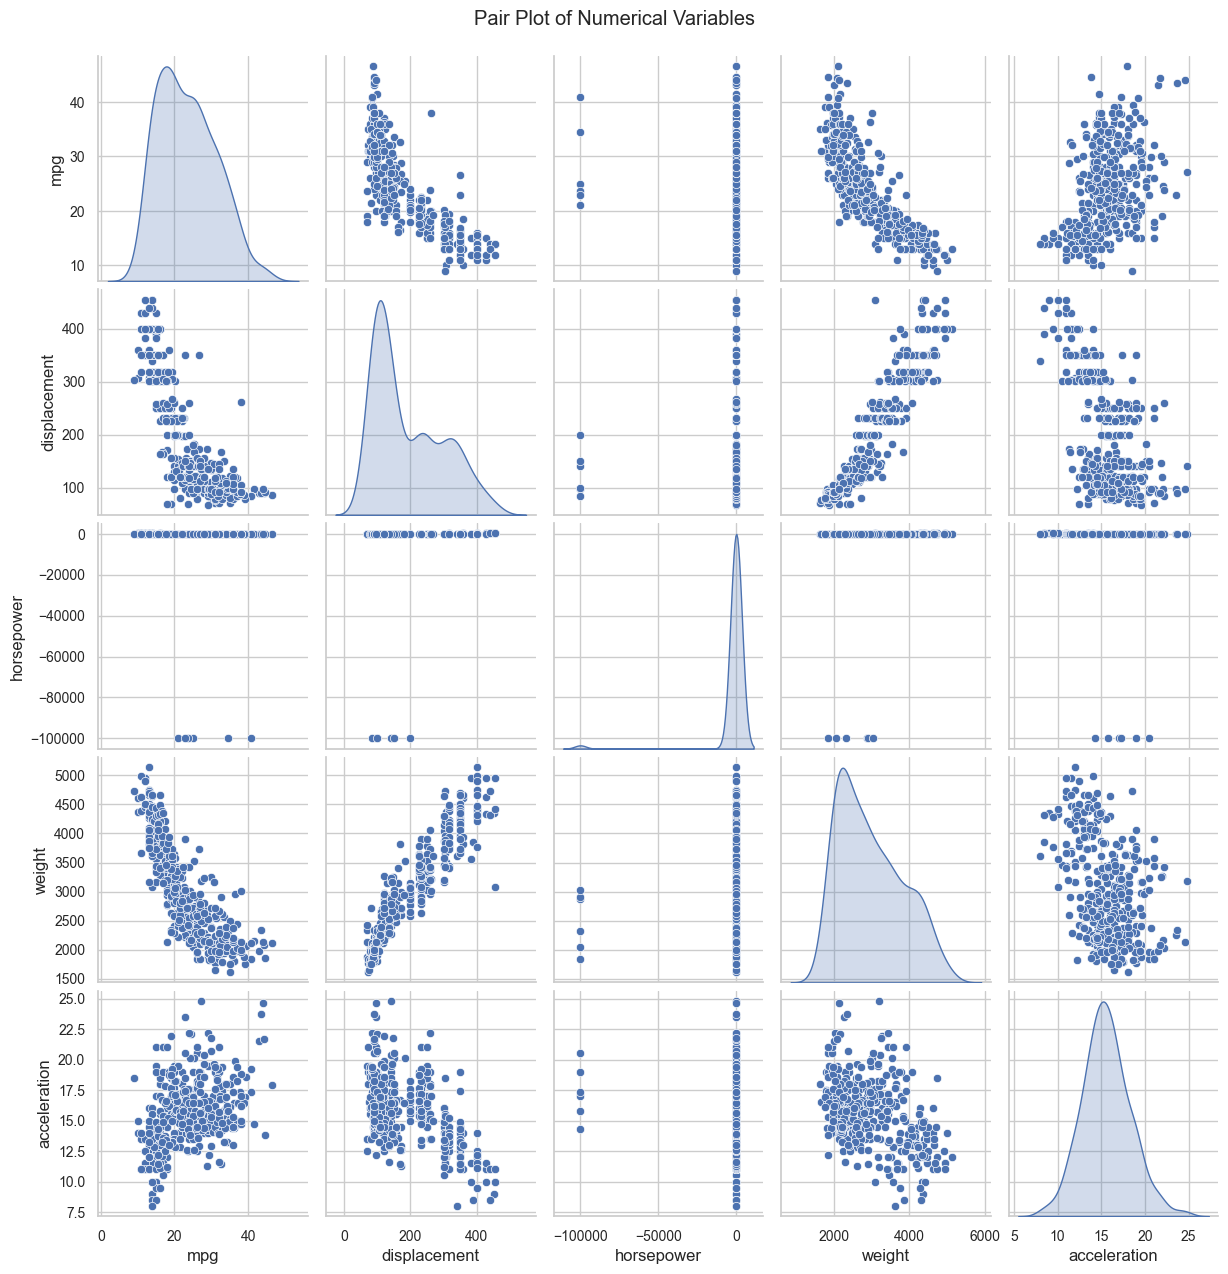

In [29]:
sns.pairplot(autoMPG_df[['mpg', 'displacement', 'horsepower', 'weight', 'acceleration']], diag_kind='kde')
plt.suptitle('Pair Plot of Numerical Variables', y=1.02)
plt.show()


***Insights***

- **Fuel efficiency (`mpg`)** is negatively correlated with **displacement**, **horsepower**, and **weight**. This means that vehicles with larger engines, more power, and greater weight tend to have lower fuel efficiency.
- **Displacement**, **horsepower**, and **weight** are positively correlated with each other, indicating that heavier vehicles often have larger engines and more horsepower.
- **Acceleration** shows weaker relationships with the other variables, suggesting that it's less influenced by factors like engine size or vehicle weight.

The distribution of the variables also highlights that most vehicles in the dataset are clustered within certain ranges for fuel efficiency, displacement, weight, and acceleration.

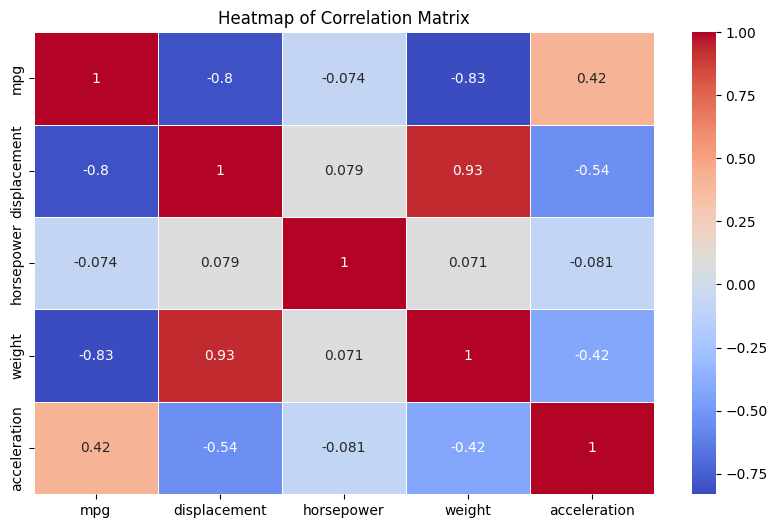

In [9]:
corr_matrix = autoMPG_df[['mpg', 'displacement', 'horsepower', 'weight', 'acceleration']].corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Correlation Matrix')
plt.show()


***Insights***

- **mpg** (fuel efficiency) is **strongly negatively correlated** with **displacement** (-0.8), **weight** (-0.83), and to a lesser extent, **horsepower** (-0.074), indicating that larger engines, heavier cars, and more powerful engines tend to have lower fuel efficiency.
- **mpg** has a **moderate positive correlation** with **acceleration** (0.42), meaning cars with better acceleration tend to have higher fuel efficiency.
  
- **Displacement** has a **strong positive correlation** with **weight** (0.93) and **horsepower** (0.079). This indicates that cars with larger engines also tend to be heavier and more powerful.
  
- **Weight** shows a **strong positive correlation** with **displacement** (0.93) and a **negative correlation** with **acceleration** (-0.42), meaning that heavier cars tend to have larger engines but slower acceleration.

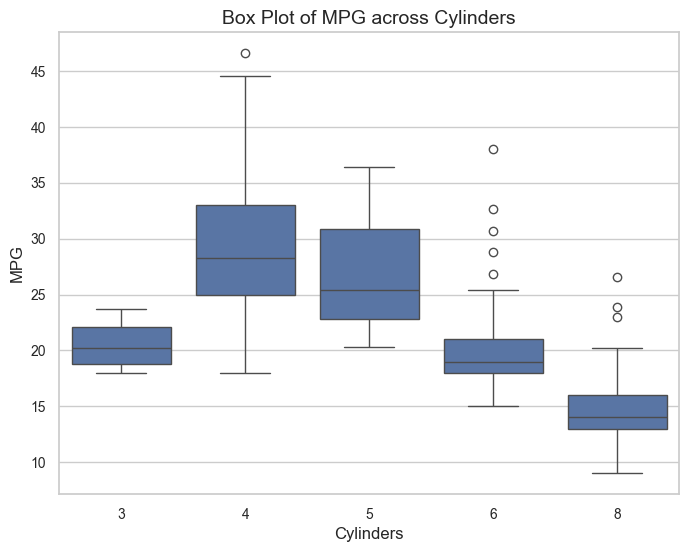

In [31]:
# Boxplot of mpg across different cylinders
plt.figure(figsize=(8, 6))
sns.boxplot(x='cylinders', y='mpg', data=autoMPG_df)
plt.title('Box Plot of MPG across Cylinders')
plt.xlabel('Cylinders')
plt.ylabel('MPG')
plt.show()


***Insights***

1. **Cylinders and Fuel Efficiency**: 
   - Cars with **4 cylinders** have the **highest median MPG**, indicating they are generally more fuel-efficient. The range of MPG for 4-cylinder cars is also wide, showing some high fuel efficiency outliers.
   - As the **number of cylinders increases**, the **MPG decreases**. Cars with **6 and 8 cylinders** have notably lower fuel efficiency, as reflected by their lower median MPG values.

2. **Spread and Outliers**:
   - **3-cylinder** cars have a smaller range of MPG values, with a tight interquartile range (IQR), meaning their fuel efficiency is relatively consistent.
   - **8-cylinder** cars have the lowest fuel efficiency with a narrow IQR, showing that these cars generally offer poor MPG. There are several outliers in the lower end, further confirming inefficiency.
   - **6-cylinder** cars show some variability, but like 8-cylinder cars, they generally have lower MPG values with a few outliers.
   
3. **Outliers**:
   - The plot shows **outliers** for most cylinder counts, especially in the **4-cylinder** and **6-cylinder** categories, where some cars are achieving higher or lower MPG than typical for their class.

4. **5-cylinder Cars**: This group has a slightly lower median MPG compared to 4-cylinder cars but a similar range, indicating decent fuel efficiency while still being less efficient than 4-cylinder cars.

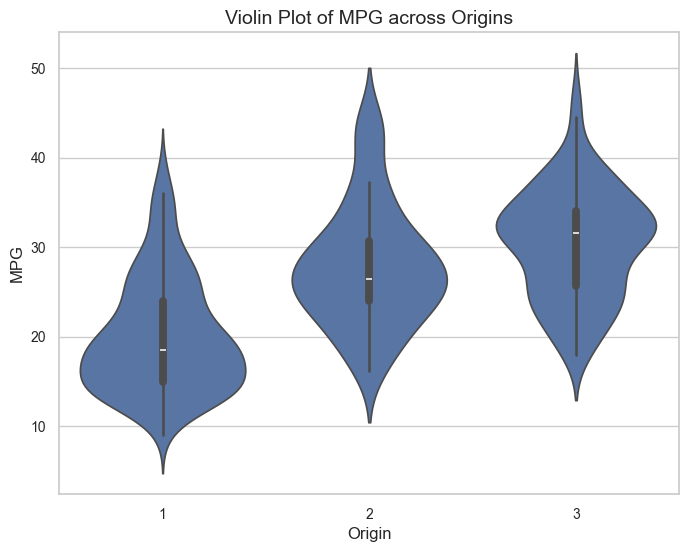

In [32]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='origin', y='mpg', data=autoMPG_df)
plt.title('Violin Plot of MPG across Origins')
plt.xlabel('Origin')
plt.ylabel('MPG')
plt.show()


***Insights***

1. **Fuel Efficiency Comparison**: 
   - Vehicles from origin 1 tend to have lower fuel efficiency, with most MPG values clustered between 15 and 25. This suggests that cars from this origin are generally less fuel-efficient.
   - Vehicles from origin 2 and 3 have higher overall MPG values, indicating better fuel efficiency. These could represent European and Asian vehicles, respectively, which are known for typically having more fuel-efficient models.

2. **Distribution Shape and Variability**:
   - The distribution for origin 1 is more concentrated in the lower MPG range, indicating a heavier presence of vehicles with lower fuel efficiency.
   - Origin 2 has the broadest distribution, indicating a wide variety of vehicles with different MPG values, reflecting both lower and higher fuel-efficient cars.
   - Origin 3 shows a more symmetric and narrow distribution, indicating that vehicles from this origin tend to have more consistently mid-to-high MPG values, suggesting a focus on fuel efficiency.

3. **Median MPG**:
   - Origin 3 has the highest median MPG, followed by origin 2, and origin 1 has the lowest. This suggests that, on average, vehicles from origin 3 are the most fuel-efficient, while those from origin 1 are the least.

4. **Spread and Outliers**:
   - While all three origins have vehicles with both low and high MPG values, origin 2 has the largest range, indicating a greater variability in fuel efficiency.
   - The data suggests that although there are a few high-efficiency vehicles in origin 1, most are concentrated in lower efficiency ranges.

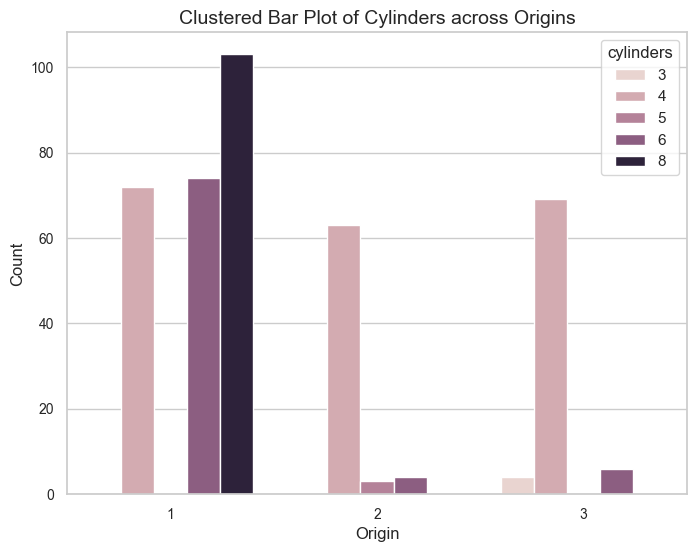

In [33]:
plt.figure(figsize=(8, 6))
sns.countplot(x='origin', hue='cylinders', data=autoMPG_df)
plt.title('Clustered Bar Plot of Cylinders across Origins')
plt.xlabel('Origin')
plt.ylabel('Count')
plt.show()


***Insights***

1. **Origin 1**
   - The majority of vehicles have **8 cylinders**, with over 100 vehicles in this category.
   - There is also a significant number of **6-cylinder** and **4-cylinder** vehicles, with roughly equal representation for both.
   - This suggests that American vehicles tend to have more powerful engines, as they predominantly have more cylinders (6 and 8).

2. **Origin 2**
   - The majority of vehicles have **4 cylinders**, with over 60 vehicles in this category.
   - There are a few vehicles with **5 cylinders**, but very few or no vehicles with higher cylinder counts like 6 or 8.
   - This indicates that European vehicles in the dataset lean towards more fuel-efficient, smaller engines with fewer cylinders.

3. **Origin 3**
   - Like origin 2, the majority of vehicles here also have **4 cylinders**, with around 70 vehicles.
   - A few vehicles have **6 cylinders**, but the distribution is predominantly focused on smaller engines.
   - Similar to European vehicles, Asian cars tend to favor smaller, more efficient engines.

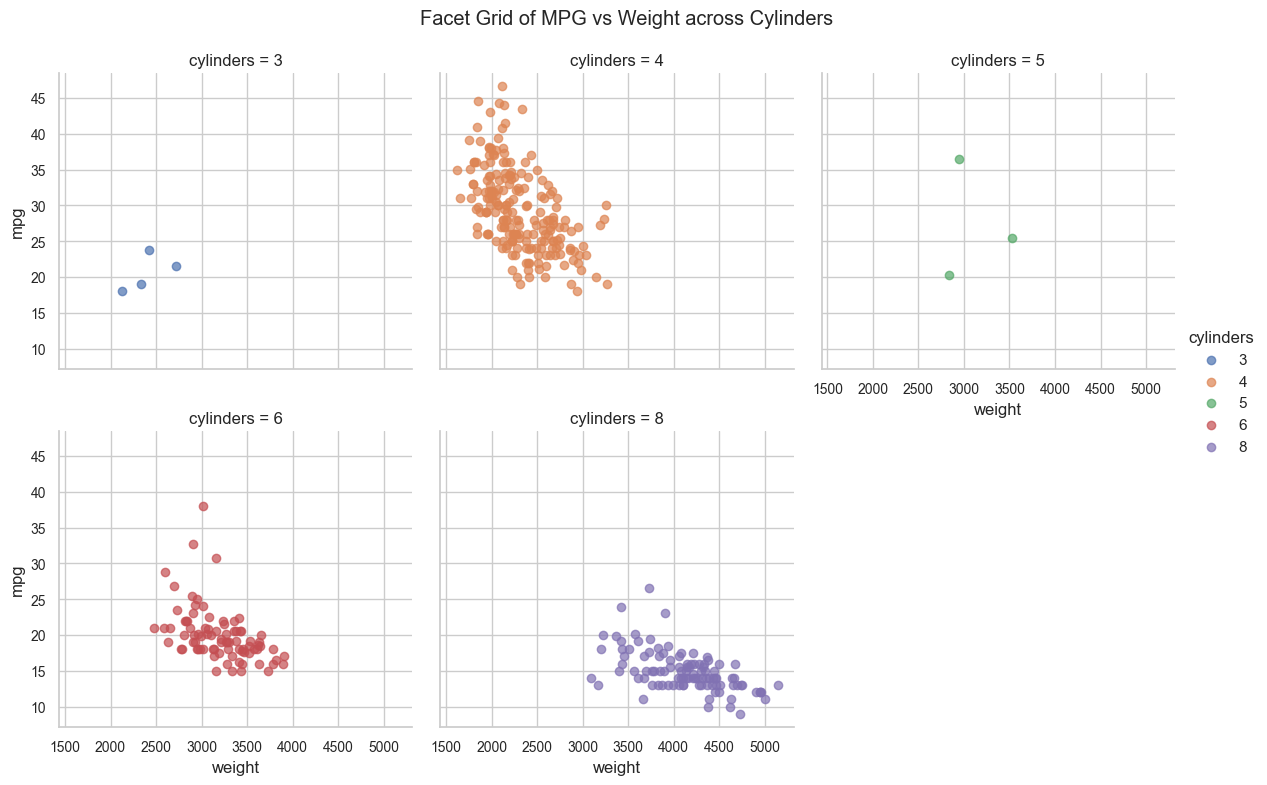

In [34]:
g = sns.FacetGrid(autoMPG_df, col='cylinders', hue='cylinders', col_wrap=3, height=4)
g.map(plt.scatter, 'weight', 'mpg', alpha=.7)
g.add_legend()
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Facet Grid of MPG vs Weight across Cylinders')
plt.show()


### Key Insights:

1. **General Trend**: 
   Across all cylinder categories, there is a negative correlation between weight and MPG. Heavier vehicles tend to have lower fuel efficiency (MPG), regardless of the number of cylinders. As vehicle weight increases, MPG decreases.

2. **3-Cylinder Vehicles**:
   - Very few data points for 3-cylinder vehicles are shown.
   - These vehicles are lighter in weight (around 2,000 to 2,500 lbs) and achieve relatively moderate MPG (between 20 and 25 MPG).

3. **4-Cylinder Vehicles**:
   - These vehicles span a wider range of weights (from about 1,500 to 3,500 lbs).
   - There is a clear negative trend: lighter vehicles achieve much higher MPG (around 40 MPG) compared to heavier ones, which go as low as 20 MPG.
   - 4-cylinder engines are generally associated with higher fuel efficiency, especially for lighter cars.

4. **5-Cylinder Vehicles**:
   - There are very few data points for 5-cylinder vehicles, but they are generally heavier (around 3,000 to 3,500 lbs) and have moderate MPG (20 to 25 MPG).
   - The limited data suggests that 5-cylinder vehicles do not achieve high fuel efficiency and are relatively uncommon.

5. **6-Cylinder Vehicles**:
   - These vehicles tend to be heavier, typically ranging from 2,500 to 4,000 lbs.
   - Their MPG is lower, ranging from around 15 to 25 MPG, with heavier vehicles having much lower MPG.
   - The negative relationship between weight and MPG is more pronounced, as these vehicles typically fall in the middle of the efficiency spectrum.

6. **8-Cylinder Vehicles**:
   - These are the heaviest vehicles in the dataset, with weights ranging from 3,000 to over 5,000 lbs.
   - MPG is the lowest for this category, with values typically ranging from 10 to 20 MPG.
   - The negative correlation between weight and MPG is strongest here, as larger, more powerful engines are less fuel-efficient.

## Linear Regression

In [5]:
X = autoMPG_df[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin']]  # Features
y = autoMPG_df['mpg']  # Target variable

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the R-squared (R²) score
accuracy = r2_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.8471345630514175


## Feature Importance

In [13]:
coefficients = model.coef_

# Create a DataFrame to display the feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': np.abs(coefficients)  # Use absolute values of coefficients
})

# Sort features by importance
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

fi = pd.DataFrame(feature_importance)

fi

,Feature,Importance
6,origin,1.268791
5,model_year,0.805603
4,acceleration,0.125651
0,cylinders,0.112019
1,displacement,0.012167
3,weight,0.007026
2,horsepower,0.000006


## Feature Importance - Insights

1. **Origin (Importance: 1.268791)**:
   - **Origin** has the highest importance score, indicating that the country or region where the car was manufactured plays a significant role in predicting fuel efficiency. This suggests that cars from certain origins may be more fuel-efficient than others.

2. **Model Year (Importance: 0.805603)**:
   - The second most important feature is the **model year**. Newer cars might be more fuel-efficient due to advances in technology, emissions standards, or other innovations. The importance score reflects how the age of the car influences its MPG.

3. **Acceleration (Importance: 0.125651)**:
   - **Acceleration** has a moderate impact on fuel efficiency. While not as important as origin or model year, it still plays a role in determining how efficiently a car can convert fuel into forward motion.

4. **Cylinders (Importance: 0.112019)**:
   - **Cylinders** play a significant role in fuel consumption, but compared to model year and origin, their importance is lower. This is consistent with the understanding that more cylinders often result in lower fuel efficiency.

5. **Displacement (Importance: 0.012167)**:
   - **Displacement** has a very small importance score, suggesting that engine size (which displacement represents) does not heavily impact MPG when compared to other features.

6. **Weight (Importance: 0.007026)**:
   - **Weight** also has minimal importance in this case. While heavier cars generally consume more fuel, this analysis indicates that weight is not a strong determinant of fuel efficiency compared to the more important features like origin or model year.

7. **Horsepower (Importance: 0.000006)**:
   - **Horsepower** has the smallest importance value, practically zero. This implies that the engine's power output has almost no influence on predicting MPG in this particular model.

## Principal Component Analysis - Dimensionality Reduction

Explained variance by PC1: 0.5369985700306477
Explained variance by PC2: 0.1498232126863366
Explained variance by PC3: 0.1250126170062762
Explained variance by PC4: 0.10229379088729759
Explained variance by PC5: 0.06685127533434176
Explained variance by PC6: 0.014022781661000074
Explained variance by PC7: 0.004997752394100163


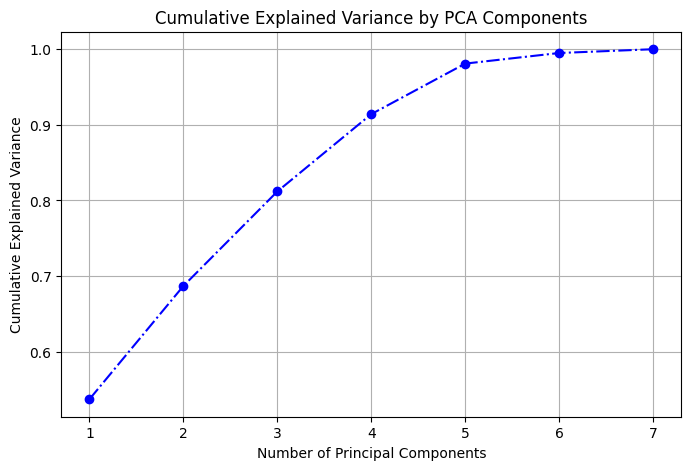

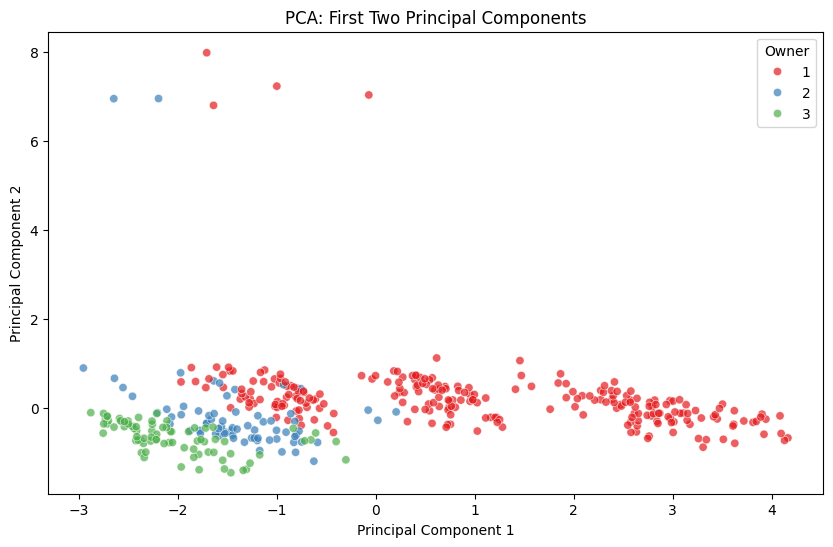

In [14]:
numeric_df = autoMPG_df[['origin', 'model_year', 'acceleration', 'cylinders', 'displacement', 'weight', 'horsepower']]
 
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df)

pca = PCA(n_components=None)
principal_components = pca.fit_transform(scaled_data)

explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

for i, var in enumerate(explained_variance):
    print(f"Explained variance by PC{i+1}: {var}")

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='-.', color='b')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x=principal_components[:, 0], y=principal_components[:, 1], hue=autoMPG_df['origin'], palette='Set1', alpha=0.7)
plt.title('PCA: First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Owner')
plt.show()


## FINAL INSIGHTS
- **Fuel Efficiency:** Cars with fewer cylinders, lower weight, and smaller engine displacement have higher `mpg` (fuel efficiency).
- **Correlation:** Strong negative correlations between `mpg` and both `weight` (-0.83) and `displacement` (-0.8) highlight their significant impact on reducing fuel efficiency.
- **Boxplot Analysis:** Cars with 3, 4, and 5 cylinders show higher fuel efficiency, while cars with 6 and 8 cylinders show lower `mpg`, with notable outliers.
- **PCA Results:** The first two principal components capture most of the variance, effectively reducing dimensionality while preserving key information about the car features, especially `origin`.
- **Statistical Tests:** Parametric and non-parametric tests confirm significant differences in fuel efficiency based on the number of cylinders and other key features.
- **Linear Regression:** `Origin`, `model_year`, and `acceleration` are the most important predictors of `mpg`, while `displacement` and `weight` have less impact once other factors are considered.
- **Feature Importance:** `Origin` and `model_year` are the most influential features in predicting `mpg`, followed by `acceleration` and `cylinders`.

## SUGGESTIONS AND CONCLUSION

Based on the insights provided, the following conclusions can be drawn:

1. **Design Considerations:** When designing or selecting cars for better fuel efficiency, manufacturers should focus on reducing the number of cylinders, weight, and engine displacement.

2. **Target Markets:** Car manufacturers targeting environmentally conscious consumers should consider producing models with fewer cylinders and lighter designs to enhance fuel efficiency.

3. **Market Trends:** The analysis suggests a trend towards vehicles with better fuel efficiency as consumers become more aware of fuel costs and environmental impacts. 

4. **PCA Significance:** The successful application of PCA indicates that dimensionality reduction techniques can be effectively used in automotive data analysis, helping to highlight key features influencing performance.

5. **Regression Insights:** The importance of `origin` and `model_year` in predicting `mpg` suggests that newer models from certain regions may inherently provide better fuel efficiency, possibly due to advancements in technology and design.

6. **Future Research Directions:** Further investigations could explore the interaction between these features and external factors such as driving conditions, maintenance practices, and technological advancements (like hybrid or electric vehicles) to develop more comprehensive fuel efficiency models.

7. **Policy Implications:** Policymakers could use this information to promote regulations favoring lighter and more efficient vehicles, potentially incentivizing manufacturers to innovate in these areas.